# Lasso and Ridge Regression

**Lasso regression:** It is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.
<hr>

**Ridge Regression:** It is a way to create a predictive and explonatory model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).
<hr>

- With this brief knowledge of Lasso and Ridge, in this notebook we are going to predict the Height of the person given the age.

**Dataset can be directly downloaded from <a href="https://archive.org/download/ages-and-heights/AgesAndHeights.pkl">here</a>.**

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

## Importing Dataset

In [3]:
raw_data = pd.read_pickle('AgesAndHeights.pkl')     # Dataset Link: https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [4]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## Data Visualisation

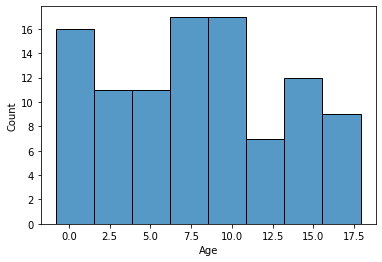

In [6]:
sns.histplot(raw_data['Age'])
plt.show()

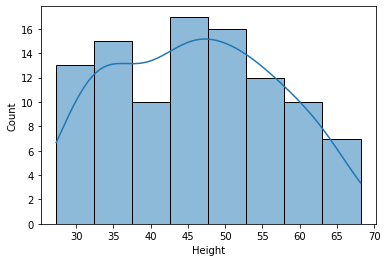

In [7]:
sns.histplot(raw_data['Height'], kde = True)
plt.show()

## Data Preprocessing

In [8]:
cleaned_data = raw_data[raw_data['Age'] > 0]
cleaned_data.shape

# 7 Columns in the Dataset where the Age was less than 0, which is pretty unobvious.

(93, 2)

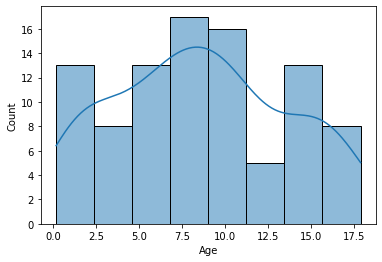

In [9]:
sns.histplot(cleaned_data['Age'], kde = True)
plt.show()

In [10]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     93 non-null     float64
 1   Height  93 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


C:\Users\Sriniketh J\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


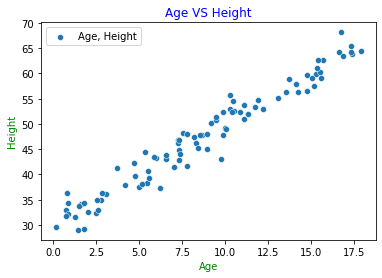

In [14]:
sns.scatterplot(cleaned_data['Age'], cleaned_data['Height'], label='Age, Height')
plt.title('Age VS Height', color='blue')
plt.xlabel('Age', color='green')
plt.ylabel('Height', color='green')
plt.legend()
plt.show()

**Scaling the Data in the range of (0, 1) to fit the model easily.**

In [15]:
scaler = MinMaxScaler()
cleaned_data = pd.DataFrame(scaler.fit_transform(cleaned_data))
cleaned_data.columns = ['Age', 'Height']
cleaned_data

,Age,Height
0,0.823652,0.781861
1,0.164592,0.182285
2,0.399681,0.457200
3,0.091537,0.003012
4,0.935899,1.000000
...,...,...
88,0.402892,0.455786
89,0.304984,0.263830
90,0.137344,0.099871
91,0.300902,0.298663


## Model Building

In [16]:
age = cleaned_data['Age']
height = cleaned_data['Height']

### Lasso

In [17]:
model_l = Lasso()
X = cleaned_data[['Age']]
y = cleaned_data[['Height']]

In [18]:
model_l.fit(X, y)

Lasso()

#### Lasso - Predict

In [19]:
np.float64(model_l.predict([[16]])*100)

46.36226692844643

### Ridge

In [20]:
model_r = Ridge()

In [21]:
model_r.fit(X, y)

Ridge()

#### Ridge - Predict

In [22]:
np.float64(model_r.predict([[16]])*10)

128.04771476386978

# Summary

*Input (Age):* 16

| **Model Name** | **Results** |
| :-----: | :----- |
| Lasso | 42.3622 |
| Ridge | 128.0477 |

- From the above table, we can conclude that Ridge model out performs Lasso by a huge margin and point to be **noted**, that it is the case with this dataset, which may prove wrong for a different Dataset.
- It also satisfies the definition of Lasso and Ridge Regression, mentioned at the start of the notebook.